Please input number of seconds to cut off: 30
Empty list of minimals with this 'n' parameter
10719066.014045
10482426.060361
peaks


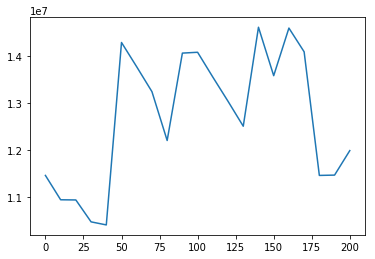

maxs


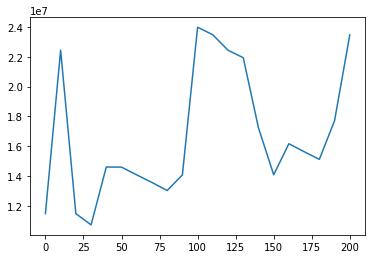

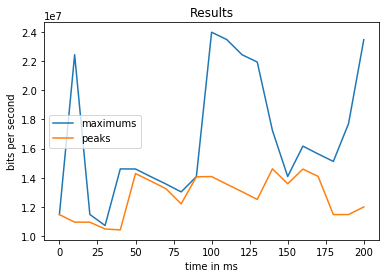

In [11]:
#without json library
%matplotlib inline
from copy import deepcopy
import matplotlib.pyplot as plt
import pylab
def parseFile(filepath):
    f=open(filepath)
    lines=f.readlines()
    to_remove=[]
    for i in range(len(lines)):
        lines[i]=lines[i].replace("\t","")
        lines[i]=lines[i].replace("\n","")
        if lines[i].find("bits_per_second") == -1:
            to_remove.append(i)
        else: 
            lines[i]=lines[i].replace("bits_per_second","")    
            lines[i]=lines[i][3::]
            lines[i]=lines[i][:-1:]
            lines[i]=float(lines[i])
    to_remove.reverse()
    for i in to_remove:
        lines.pop(i)
    lines.pop()
    lines.pop()
    lines.pop()
    lines.pop()
    i=len(lines)-1  
    while i>=0:
        lines.pop(i)
        i-=2
    return lines   
def spreadnull(args):
    i=0
    while i < len(args):
        if args[i]==0.0:
            temp=deepcopy(i)
            temp-=1
            while args[i] == 0.0:
                    i+=1      
                    if i == len(args):
                        break
            for j in range(temp,i):
                args[j]=args[temp]/(i-temp)    
            continue
        i+=1    
    return args    
def tofindmin(args):
    args.reverse()
    for i in range(n):
        args.pop()
    return min(args)

def findpeak(args):
    args.sort()
    return args[int(len(args)*0.95)]


n=int(input("Please input number of seconds to cut off: "))
filepath='./jsons/res_client_'
listmins=[]
listmax=[]
listpeaks=[]
listms=[]
lines=parseFile('./jsons/res_client_30ms.json')
lines=spreadnull(lines)
peak=findpeak(deepcopy(lines))
if n == 30:
    print("Empty list of minimals with this 'n' parameter")
else: 
    minimum=tofindmin(deepcopy(lines))
    print(minimum)
print(max(lines))
print(peak)
for i in range(0,201,10):
    lines=parseFile(filepath+str(i)+'ms.json')
    lines=spreadnull(lines)
    if n!= 30:
        listmins.append(tofindmin(deepcopy(lines)))
    listmax.append(max(lines))
    listpeaks.append(findpeak(deepcopy(lines)))
    listms.append(i)
pylab.plot(listms,listpeaks)
print("peaks")
pylab.show()
pylab.plot(listms,listmax)
print("maxs")
pylab.show()
if n != 30:
    pylab.plot(listms,listmins)
    print("mins")
    pylab.show()



fig=plt.figure()
plt.plot(listms,listmax,label='maximums')
plt.plot(listms,listpeaks,label='peaks')
if n!= 30:
    plt.plot(listms,listmins,label='mins')
plt.ylabel('bits per second')
plt.xlabel('time in ms')
plt.title('Results')
plt.legend()
plt.show()